In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
#Converting the date column to a datetime format 
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
#Sorting the dataframe by date
df.sort_values("Date", inplace = True)

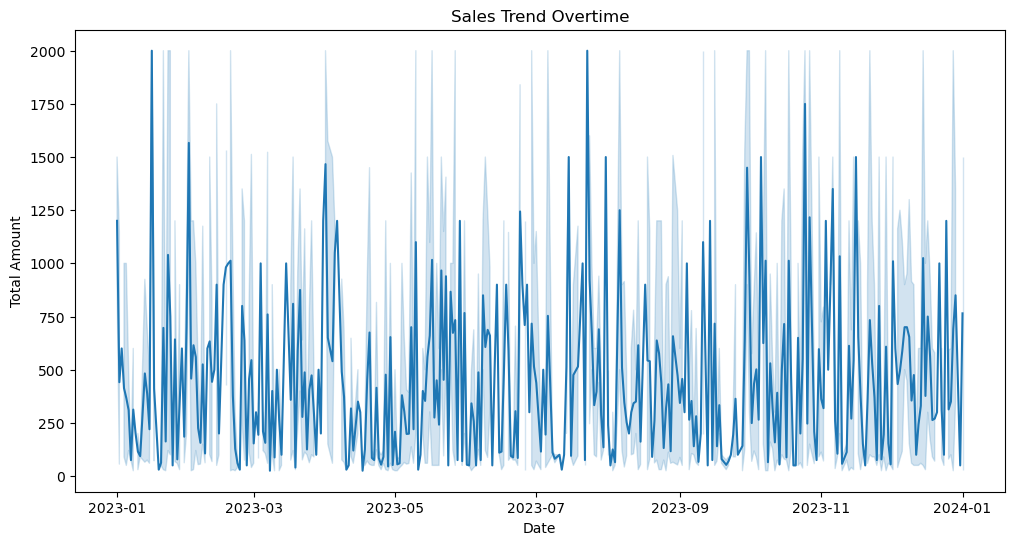

In [9]:
#Line plot showing the trend of sales overtime
plt.figure(figsize=(12, 6))
sns.lineplot(x = "Date", y = "Total Amount", data = df)
plt.title("Sales Trend Overtime")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.show()

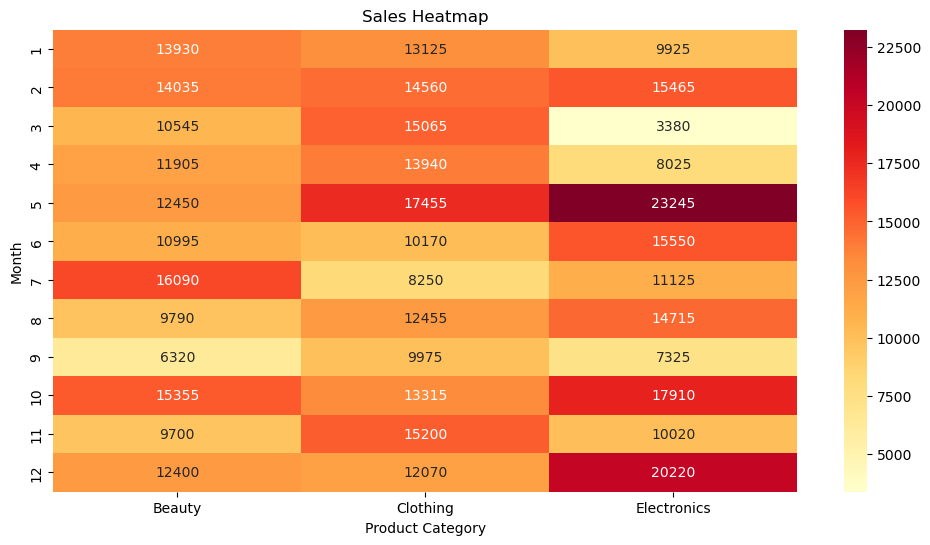

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Month'] = df['Date'].dt.month
heatmap_data = df.pivot_table(index='Month', columns='Product Category', values='Total Amount', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()


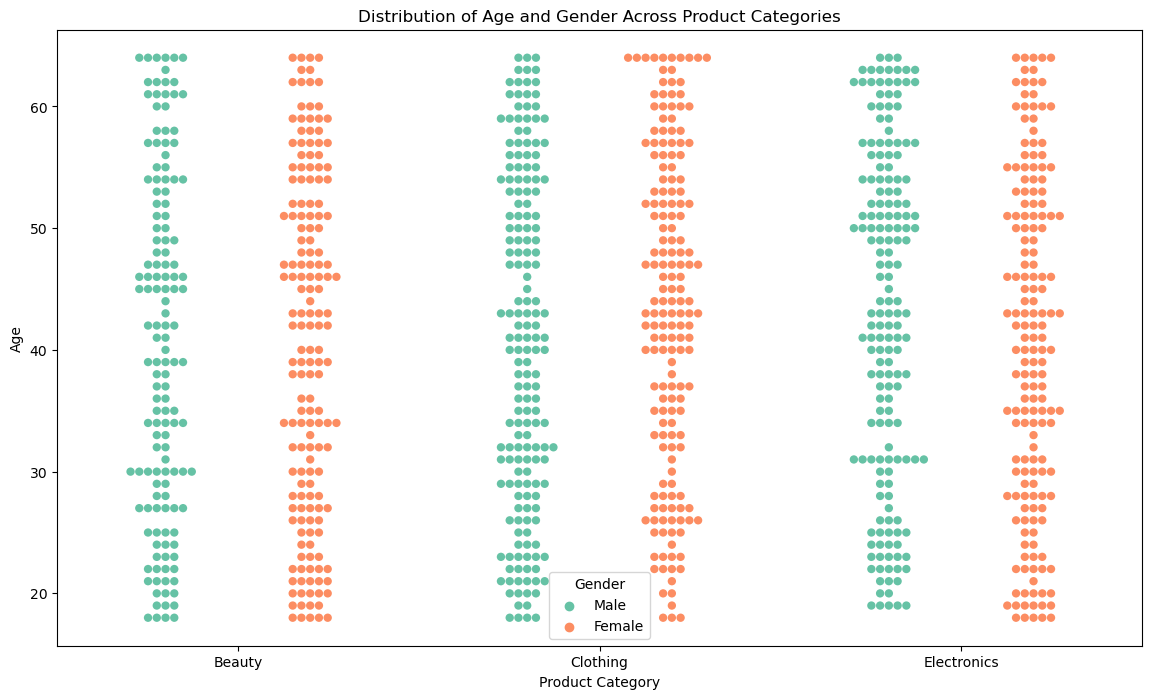

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, size=6, palette="Set2", dodge=True)
plt.title('Distribution of Age and Gender Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.legend(title='Gender')

plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521 to 649
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 85.9+ KB


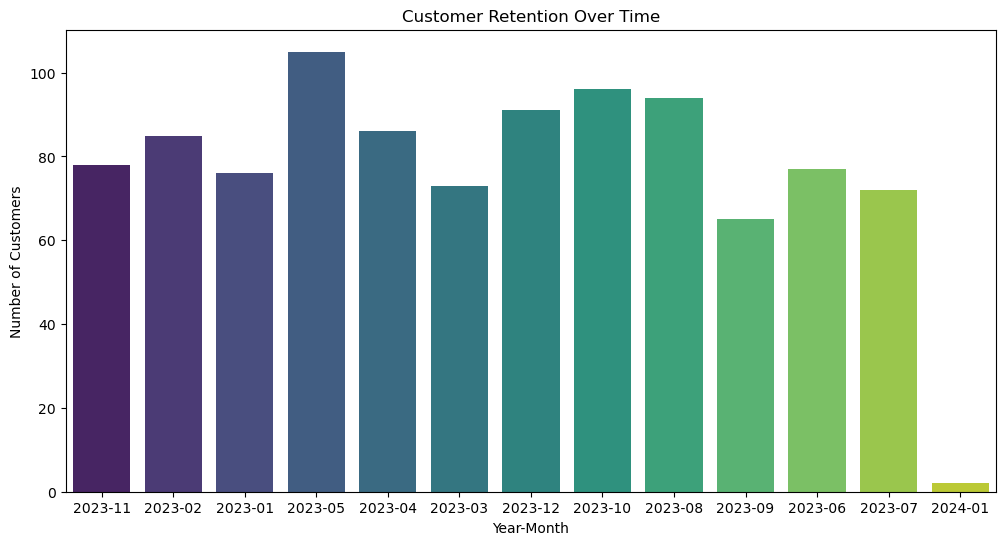

In [13]:
customer_retention = df.groupby('Customer ID')['Date'].min().reset_index()
customer_retention['YearMonth'] = customer_retention['Date'].dt.to_period('M')

plt.figure(figsize=(12, 6))
sns.countplot(x='YearMonth', data=customer_retention, palette='viridis')
plt.title('Customer Retention Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')
plt.show()


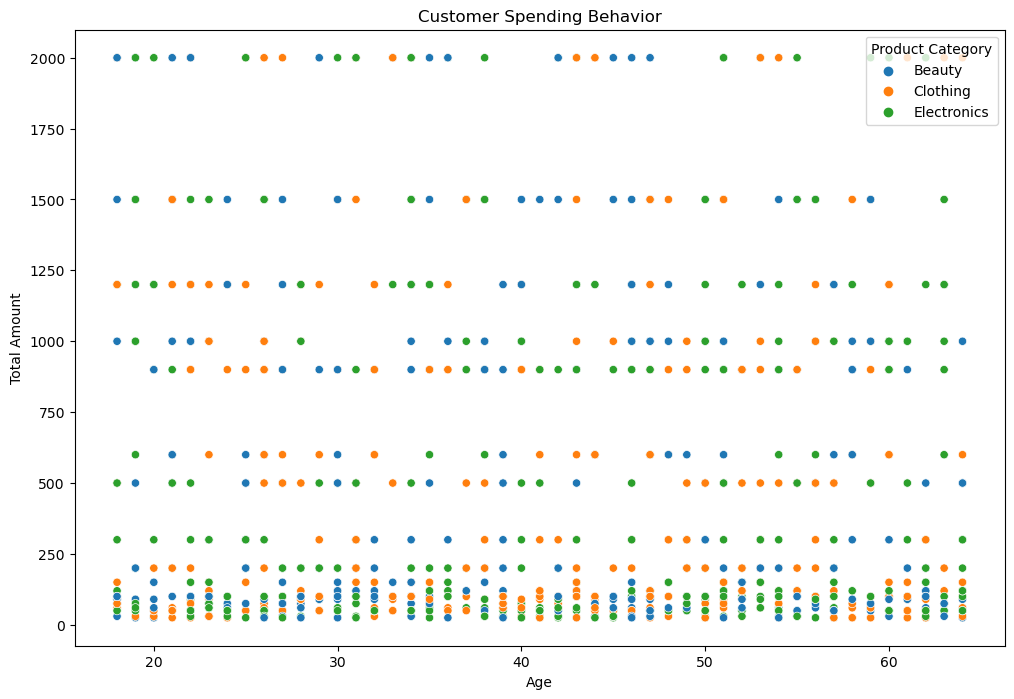

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Total Amount', data=df, hue='Product Category')
plt.title('Customer Spending Behavior')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.show()
